# Introdução a Machine Learning 

## MNIST Dataset 

### Pedro Neto e Rafael Santos, ISEP 2019

### Tarefa 1 - Importar dataset

O dataset a ser utilizado faz parte dos muitos disponibilizados pelo Sckit-learn. A tarefa consiste em importa-lo. 

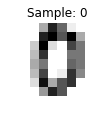

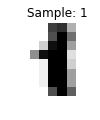

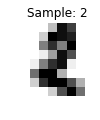

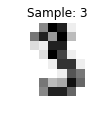

In [43]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import numpy 

digits = datasets.load_digits()
    
images = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Sample: %i' % label)
    plt.show()

### Tarefa 2 - Converter as imagens

Aqui o objetivo é converter as imagens num array de features. Cada imagem é 8x8, então teremos 64 features para cada imagem.
No fim obteremos uma matrix (MxN) sendo M o numero de imagens e N o numero de features.

In [7]:
n_samples = len(digits.images)
dataset = digits.images.reshape((n_samples, -1))
y = digits.target
print(dataset[0,:])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


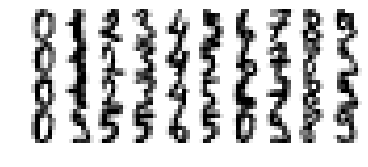

In [8]:
# Extra
def plot_digits(instances, images_per_row=10, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

plot_digits(dataset[:40],10)

### Tarefa 3 - Dividir o dataset 

O dataset deve ser dividido em 2 partes, uma primeira com a qual iremos treinar o nosso modelo, e uma segunda com a qual iremos verificar e avaliar o nosso modelo.

Obs: Os ratios sugeridos são de 80% para a primeira parte e 20% para a segunda, mas sintam-se livres para experimentar outros ratios. 

In [9]:
ratio = 0.8
size = len(dataset[:,0])
limit = int(ratio * size)
train_set = dataset[0:limit,:]
y_train = y[0:limit]
test_set = dataset[limit:size,:]
y_test = y[limit:size]

### Tarefa 4 - Classificador Binário

Neste bloco a tarefa passa por utilizar um algoritmo qeu verifique se um determinado número representa um 3 ou não. Trata-se de um classificador binário pois existem apenas duas classes. Para efetuar a classificação, vamos utilizar a classe SGDClassifier do package Scikit-learn. 

In [10]:
from sklearn import linear_model
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

binary_classifier = linear_model.SGDClassifier()
binary_classifier.fit(train_set,y_train_3)

/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Tarefa 5 - Métricas de avaliação 

Para avaliar o nosso modelo vamos utilizar os valores de cross validation, de precisão, de recall e analizar a matriz de confusão. 

In [11]:
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(binary_classifier, train_set, y_train_3, cv=3, scoring="accuracy")

/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in 

array([0.98541667, 0.97286013, 0.98953975])

Confusion Matrix [[1236   55]
 [   6  140]]


/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in 

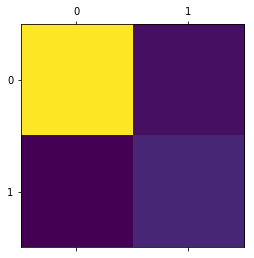

In [12]:
from sklearn.metrics import confusion_matrix
y_train_pred_3 = cross_val_predict(binary_classifier, train_set, y_train_3, cv=3)
cnf_matrix = confusion_matrix(y_train_3, y_train_pred_3)
print("Confusion Matrix",cnf_matrix)
plt.matshow(cnf_matrix)
plt.show()

In [13]:
from sklearn.metrics import precision_score,f1_score,recall_score
print("Precision = ",precision_score(y_train_3, y_train_pred_3))

print("Recall = ",recall_score(y_train_3, y_train_pred_3))

print("F1 = ",f1_score(y_train_3, y_train_pred_3))

Precision =  0.717948717948718
Recall =  0.958904109589041
F1 =  0.8211143695014662


### Tarefa 6 - Decision tree

De forma a termos dois modelos para poder comparar, vamos repetir o processo, mas desta vez num DecisionTreeClassifier. 
Os modelos de Precisão, Recall e F1 serão os nossos pontos de comparação.

Confusion Matrix 
 [[1260   31]
 [  36  110]]


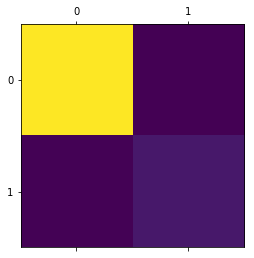

Precision =  0.7801418439716312
Recall =  0.7534246575342466
F1 =  0.7665505226480838


In [14]:
from sklearn.tree import DecisionTreeClassifier

binary_classifier = DecisionTreeClassifier()
binary_classifier.fit(train_set,y_train_3)

y_train_pred_3 = cross_val_predict(binary_classifier, train_set, y_train_3, cv=3)
cnf_matrix = confusion_matrix(y_train_3, y_train_pred_3)
print("Confusion Matrix \n",cnf_matrix)
plt.matshow(cnf_matrix)
plt.show()

print("Precision = ",precision_score(y_train_3, y_train_pred_3))

print("Recall = ",recall_score(y_train_3, y_train_pred_3))

print("F1 = ",f1_score(y_train_3, y_train_pred_3))



### Tarefa 6 - Classificação Multiclasse

Agora vamos tentar classificar cada imagem no seu respetivo digito. Para isso vamos utilizar classificadores ligeiramente mais complexos como uma rede neural e uma random forest. Estes classificadores precisão de um controlo maior sobre os seus parametros. Desta forma é utilizada um GridSearch para procurar a melhor combinação destes parametros. 

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Neural Network

In [33]:
grid_params = [{
                 'learning_rate': ["invscaling"],
                 'learning_rate_init': [0.1],
                 'alpha': [0.01,0.0014],
                 'activation': ["relu"],
                 'max_iter': [10000],
                 'solver': ["lbfgs"],
                 "hidden_layer_sizes": [(100,)]
             }]
nn_classifier = MLPClassifier()
grid_search_neuralnet = GridSearchCV(estimator=nn_classifier,param_grid=grid_params,cv=3,scoring="accuracy")

In [34]:
grid_search_neuralnet.fit(train_set,y_train)
print(grid_search_neuralnet.best_estimator_)
print(grid_search_neuralnet.best_score_)

/Users/pedroneto/Desktop/workshop/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MLPClassifier(activation='relu', alpha=0.0014, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='invscaling',
       learning_rate_init=0.1, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
0.9464161447459986


#### Random Forest

In [35]:
grid_params = [{"n_estimators": [100,200,300,400],"criterion" : ["gini","entropy"],"min_samples_split":[5,10]}]
random_forest = RandomForestClassifier()
grid_search_forest = GridSearchCV(estimator=random_forest,param_grid=grid_params,cv=3,scoring="accuracy")

In [36]:
grid_search_forest.fit(train_set,y_train)
print(grid_search_forest.best_estimator_)
print(grid_search_forest.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9255393180236604


In [39]:
from sklearn.metrics import accuracy_score
y_predNN = grid_search_neuralnet.predict(test_set)
y_predRandom = grid_search_forest.predict(test_set)

print("Test Precision NN = ", accuracy_score(y_predNN, y_test) )
print("Test Precision Random Forest = ", accuracy_score(y_predRandom, y_test))

Test Precision NN =  0.9111111111111111
Test Precision Random Forest =  0.9194444444444444


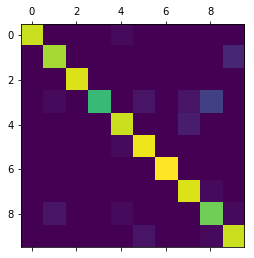

In [42]:
plt.matshow( confusion_matrix(y_test,y_predRandom))
plt.show()